In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('height_weight_genders.csv')

In [3]:
df['Gender'] = (df['Gender'] == 'Female').astype('int')

In [4]:
df.describe()

,Gender,Height,Weight
count,10000.000000,10000.000000,10000.000000
mean,0.500000,66.367560,161.440357
std,0.500025,3.847528,32.108439
min,0.000000,54.263133,64.700127
25%,0.000000,63.505620,135.818051
50%,0.500000,66.318070,161.212928
75%,1.000000,69.174262,187.169525
max,1.000000,78.998742,269.989699


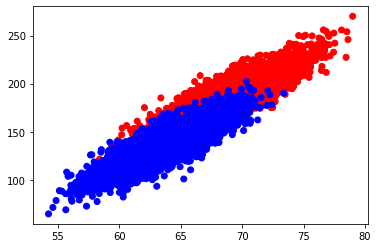

In [5]:
plt.scatter(df.Height, df.Weight, c=np.where(df.Gender == 1, 'b', 'r'))

In [6]:
from sklearn.model_selection import train_test_split

x_tot, y_tot = df[['Height', 'Weight']], df.Gender
train_x, test_x, train_y, test_y = train_test_split(x_tot, y_tot)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression(penalty='l1')
model.fit(train_x, train_y)
prediction = model.predict(test_x)
metrics.accuracy_score(prediction, test_y)

/Users/avalente/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/avalente/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.916

In [8]:
prediction_multi = model.predict_proba(test_x)[:, 1]
print(metrics.roc_auc_score(test_y, prediction_multi))

0.9706118613789267


In [9]:
fpr, tpr, _ = metrics.roc_curve(test_y, prediction_multi)

Text(0, 0.5, 'TPR')

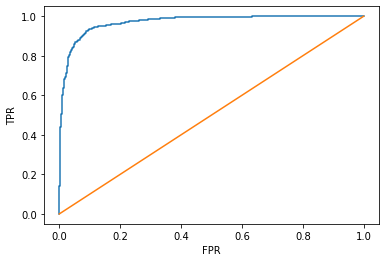

In [12]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')

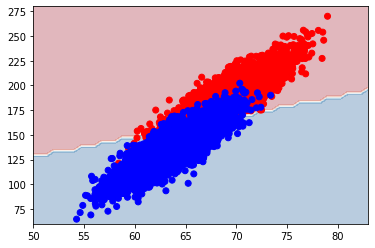

In [11]:
xs = np.linspace(50, 83)
ys = np.linspace(60, 280)
X, Y = np.meshgrid(xs, ys)
decisions = model.predict(np.vstack([X.ravel(), Y.ravel()]).T)
plt.contourf(X, Y, decisions.reshape(50, 50), cmap='RdBu', alpha=.3)

plt.scatter(df.Height, df.Weight, c=np.where(df.Gender == 1, 'b', 'r'))